In [1]:
import pandas as pd
coefficients = []

In [2]:
# %run data_processing.py
import numpy as np
import json
import string
import operator
from collections import *

class OrderedCounter(Counter, OrderedDict):
    pass

# array is 


"""
 Brainstormed features:
 - sentiment analysis
"""

def add_features(top_words, data):
    # Word count feature
    # 100 data points
    x_train = np.zeros((10000, 161))
    y_train = np.zeros(10000)
    i = 0
    for data_point in data:
        features = np.zeros(161)
        word_list = process_string(data_point['text'])
    
        for word in word_list:
            if word in top_words:
                index = top_words.index(word)
                features[index] += 1
        features[160] = 1
        x_train[i] = features
        y_train[i] = data_point["popularity_score"]
        i = i+1

    # TODO: at least two more features: these can be 
    # based on the text data, transformations of the other numeric features, or interaction terms. 
    return x_train, y_train

def calculate_closed_form(X, Y):
    coeffs = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)
    return coeffs

def read_json_file():
    file = open('./data/proj1_data.json', 'r')
    data= file.read()
    file.close()
    json_data = json.loads(data)
    return json_data

def process_string(str):
    return str.lower().split(' ')

def count_top_words(data):
    print("Finding top words")
    word_freq = OrderedCounter()
    for line in data:
        word_list = process_string(line['text'])
        word_freq.update(word_list)
    most_common = dict(word_freq.most_common(160))
    return list(most_common.keys())

def split_data(data, first_split, second_split, third_split):
    train, validation, test = [], [], []

    for i in range(0, first_split):
        train.append(data[i])
    print(("Created training dataset. Sample from training data: {}").format(train[0]))

    for i in range(first_split, second_split):
        validation.append(data[i])
    print(("Created validation dataset. Sample from validation data: {}").format(validation[0]))

    for i in range(second_split, third_split):
        test.append(data[i]) 
    print(("Created test dataset. Sample from validation data: {}").format(test[0]))

    return train, validation, test

def main():
    data = read_json_file()

    """
    Use the first 10,000 points for training, the next 1,000 for validation, and the final 1,000 for testing.
    """
    train, validation, test = split_data(data, 10000, 11000, 12000)

    top_words = count_top_words(train)
    # print(top_words)
    
    data_with_features, y_train = add_features(top_words, train)
    coefficients = calculate_closed_form(data_with_features, y_train)
    return coefficients

if __name__ == '__main__':
    coefficients = main()

Created training dataset. Sample from training data: {u'is_root': False, u'text': u'ITS RAINING SIDEWAYS', u'popularity_score': 1.254698160267241, u'controversiality': 0, u'children': 0}
Created validation dataset. Sample from validation data: {u'is_root': True, u'text': u'Kidney infection and subsequent stones. ', u'popularity_score': 0.8433369681773519, u'controversiality': 0, u'children': 0}
Created test dataset. Sample from validation data: {u'is_root': True, u'text': u"Some asshole shot 9 innocent people at a church.  I live in such a beautiful city, and it sucks that this made national headlines.  Charleston is beautiful.  It's been proven over and over again.  You owe it to yourself to visit.", u'popularity_score': 0.7204745721237265, u'controversiality': 0, u'children': 1}
Finding top words


In [7]:
import numpy as np
import json
import string
import operator
from collections import *

class OrderedCounter(Counter, OrderedDict):
    pass

"""
 Brainstormed features:
 - sentiment analysis
"""

def get_features(top_words, data):
    num_data_points = len(data)
    num_features = len(top_words) + 4

    x_train = np.zeros((num_data_points, num_features))
    y_train = np.zeros(num_data_points)
    i = 0
    for data_point in data:
        features = np.zeros(num_features)
        word_list = process_string(data_point['text'])
    
        for word in word_list:
            if word in top_words:
                index = top_words.index(word)
                features[index] += 1

        features[num_features - 4] = data_point["controversiality"]
        features[num_features - 3] = data_point["children"]
        features[num_features - 2] = 1 if data_point["is_root"] else 0
        features[num_features - 1] = 1 # bias term

        x_train[i] = features
        y_train[i] = data_point["popularity_score"]
        i = i+1

    # TODO: at least two more features: these can be 
    # based on the text data, transformations of the other numeric features, or interaction terms. 
    return x_train, y_train

def calculate_closed_form(X, Y):
    coeffs = np.linalg.inv(X.transpose().dot(X)).dot(X.transpose()).dot(Y)
    return coeffs

def calculate_gradient_descent(X, y, init_weights, beta=10**-9, alpha=10**-6, epsilon=4*10**-5):
    error = 10
    new_weights = init_weights

    while error > epsilon:
        weights = new_weights

        # the error was here, Prof mentioned in class that the learning rate
        # should be scaled by 1/n where n = # training points
        gradient = X.T.dot(X.dot(weights) - y)
        new_weights = weights - 2* alpha/(1+beta) * gradient
        error = np.linalg.norm((new_weights - weights),2)
        # print(error)

    return new_weights

def read_json_file():
    file = open('./data/proj1_data.json', 'r')
    data= file.read()
    file.close()
    json_data = json.loads(data)
    return json_data

def process_string(str):
    return str.lower().split(' ')

def count_top_words(data, num_top_words):
    word_freq = OrderedCounter()
    for line in data:
        word_list = process_string(line['text'])
        word_freq.update(word_list)
    most_common = dict(word_freq.most_common(num_top_words))
    return list(most_common.keys())

def split_data(data, first_split, second_split, third_split):
    train, validation, test = [], [], []

    for i in range(0, first_split):
        train.append(data[i])

    for i in range(first_split, second_split):
        validation.append(data[i])

    for i in range(second_split, third_split):
        test.append(data[i]) 

    return train, validation, test

def calculate_mean_squared_error(predicted_scores, actual_scores):
    total_error = 0
    for x, y in np.nditer([predicted_scores, actual_scores]):
        squared_difference = (x - y)**2 
        total_error += squared_difference
    mean_squared_error = total_error / len(predicted_scores)
    return mean_squared_error

def evaluate_model(top_words, weights, dataset):
    x_validate, y_validate = get_features(top_words, dataset)
    predicted_scores_validate = x_validate.dot(weights)
    actual_scores_validate = y_validate
    error = calculate_mean_squared_error(predicted_scores_validate, actual_scores_validate)
    return error 

def main():
    data = read_json_file()

    """
    Use the first 10,000 points for training, the next 1,000 for validation, and the final 1,000 for testing.
    """
    train, validation, test = split_data(data, 10000, 11000, 12000)

    top_words = count_top_words(train, 160) # top 160 words
    
    x_train, y_train = get_features(top_words, train)

    """
    Calculate closed form and gradient descent weights.
    """
    closed_form_weights = calculate_closed_form(x_train, y_train)
    closed_form_error = evaluate_model(top_words, closed_form_weights, train)
    print("Mean squared error is " + str(closed_form_error) + " for closed form weights on the training set.")

    weights = np.zeros(164)
    gradient_descent_weights = calculate_gradient_descent(x_train, y_train, weights, beta=0.1)
    gradient_descent_error = evaluate_model(top_words, gradient_descent_weights, train)
    print("Mean squared error is " + str(gradient_descent_error) + " for gradient descent weights on the training set.")
 
    # print out weights, include in report
    """
    Evaluate closed form and gradient descent weights.
    """
    closed_form_error = evaluate_model(top_words, closed_form_weights, validation)
    print("Mean squared error is " + str(closed_form_error) + " for closed form weights on the validation set.")

    gradient_descent_error = evaluate_model(top_words, gradient_descent_weights, validation)
    print("Mean squared error is " + str(gradient_descent_error) + " for gradient descent weights on the validation set.")

    """
    Create and evaluate models with no text features, top 60 words, and top 160 words
    """
    # no text features
    no_text_x_train, no_text_y_train = get_features([], train)
    no_text_closed_form_weights = calculate_closed_form(no_text_x_train, no_text_y_train)
    no_text_training_error = evaluate_model([], no_text_closed_form_weights, train)
    no_text_validation_error = evaluate_model([], no_text_closed_form_weights, validation)
    print("MSE is " + str(no_text_training_error) + " for no-text features model on the training set. (closed form)" )
    print("MSE is " + str(no_text_validation_error) + " for no-text features model on the validation set. (closed form)" )

    # top 60 words
    top_words = count_top_words(train, 60)
    top60_x_train, top60_y_train = get_features(top_words, train)
    top60_closed_form_weights = calculate_closed_form(top60_x_train, top60_y_train)
    top60_training_error = evaluate_model(top_words, top60_closed_form_weights, train)
    top60_validation_error = evaluate_model(top_words, top60_closed_form_weights, validation)
    print("MSE is " + str(top60_training_error) + " for 60-word features model on the training set. (closed form)" )
    print("MSE is " + str(top60_validation_error) + " for 60-word features model on the validation set. (closed form)" )

    # top 160 words
    top_words = count_top_words(train, 160)
    top160_x_train, top60_y_train = get_features(top_words, train)
    top160_closed_form_weights = calculate_closed_form(top160_x_train, top60_y_train)
    top160_training_error = evaluate_model(top_words, top160_closed_form_weights, train)
    top160_validation_error = evaluate_model(top_words, top160_closed_form_weights, validation)
    print("MSE is " + str(top160_training_error) + " for 160-word features model on the training set. (closed form)" )
    print("MSE is " + str(top160_validation_error) + " for 160-word features model on the validation set. (closed form)" )

    return top160_closed_form_weights

    

if __name__ == '__main__':
    coefficients = main()
    
    
    

Mean squared error is 1.046832911778383 for closed form weights on the training set.
Mean squared error is 1.047460429101807 for gradient descent weights on the training set.
Mean squared error is 0.9895357003238052 for closed form weights on the validation set.
Mean squared error is 0.9905534926478462 for gradient descent weights on the validation set.
MSE is 1.084683070915726 for no-text features model on the training set. (closed form)
MSE is 1.0203266848431438 for no-text features model on the validation set. (closed form)
MSE is 1.0602298261175074 for 60-word features model on the training set. (closed form)
MSE is 0.9831859696254964 for 60-word features model on the validation set. (closed form)
MSE is 1.046832911778383 for 160-word features model on the training set. (closed form)
MSE is 0.9895357003238052 for 160-word features model on the validation set. (closed form)


In [8]:
coefficients

array([-1.57326527e-02, -2.66172151e-02, -3.16713926e-02, -1.53615707e-02,
       -1.69212094e-02,  1.10177497e-01, -6.87424078e-02, -3.45790377e-01,
       -8.07603150e-03,  1.53664035e-01,  1.46223824e-03, -1.05436342e-01,
       -2.29243172e-02, -2.77632929e-02,  3.62832200e-02, -4.18932753e-02,
        3.66383322e-02,  5.57573422e-02, -2.00102377e-02,  1.23010851e-02,
        1.57306918e-01, -9.21680830e-02,  1.72372225e-02, -7.88188991e-02,
       -3.07127647e-02,  2.80994583e-03,  5.01890214e-02,  8.50286847e-02,
        1.04709616e-01,  4.65085186e-02,  9.77255587e-03,  2.76666344e-02,
        4.02936648e-02, -3.24480078e-03,  1.83087857e-02,  9.81627956e-03,
       -1.50235710e-02, -2.06605618e-02,  2.25162577e-02,  3.46953854e-02,
        4.60630807e-02,  6.28455535e-02,  9.95447999e-04,  7.58977519e-03,
        1.65528023e-01, -1.54850903e-03,  6.50730793e-03,  5.70486300e-02,
        9.45517249e-03, -4.19840305e-03,  4.88163293e-03, -6.55747889e-03,
       -6.87433904e-02,  

In [9]:
feature_dict = {"Controversiality": -1.06660606e+00, "Children": 3.73565864e-01, "Is_root": -2.37344613e-01, "Bias term": 8.51770262e-01 }

In [10]:
import seaborn as sns

Text(0.5,1,'Weights for non-text features')

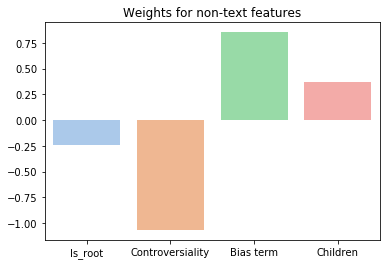

In [17]:
sns.barplot(x=feature_dict.keys(), y=feature_dict.values(), palette="pastel").set_title("Weights for non-text features")